In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset 
%matplotlib inline
plt.style.use('ggplot') 
data = load_dataset("titanic")

In [2]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.shape

(891, 15)

In [5]:
data.drop(columns="deck",inplace=True)

In [6]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [7]:
data.shape

(891, 14)

In [8]:
data["age"].mode()[0]

24.0

In [9]:
data["age"].mean()

29.69911764705882

<Axes: xlabel='age'>

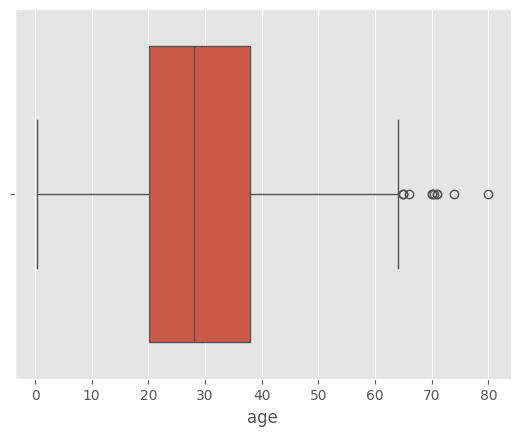

In [10]:
sns.boxplot(x="age",data=data)

In [11]:
data["age"].fillna(data["age"].mode()[0],inplace=True)

In [12]:
data["embarked"].fillna(data["embarked"].mode()[0],inplace=True)

In [13]:
data["embark_town"].fillna(data["embark_town"].mode()[0],inplace=True)

In [14]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

data["sex"]=encode.fit_transform(data["sex"])
data["embarked"]=encode.fit_transform(data["embarked"])
data["class"]=encode.fit_transform(data["class"])
data["who"]=encode.fit_transform(data["who"])
data["adult_male"]=encode.fit_transform(data["adult_male"])
data["embark_town"]=encode.fit_transform(data["embark_town"])
data["alive"]=encode.fit_transform(data["alive"])
data["alone"]=encode.fit_transform(data["alone"])

In [16]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [17]:
data.shape

(891, 14)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    int64  
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    int64  
dtypes: float64(2), int32(6), int64(6)
memory usage: 76.7 KB


In [19]:
X=data.drop(columns=["survived","alive"],axis=1)
y=data["survived"]

In [20]:
print(X)

     pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         3    1  22.0      1      0   7.2500         2      2    1   
1         1    0  38.0      1      0  71.2833         0      0    2   
2         3    0  26.0      0      0   7.9250         2      2    2   
3         1    0  35.0      1      0  53.1000         2      0    2   
4         3    1  35.0      0      0   8.0500         2      2    1   
..      ...  ...   ...    ...    ...      ...       ...    ...  ...   
886       2    1  27.0      0      0  13.0000         2      1    1   
887       1    0  19.0      0      0  30.0000         2      0    2   
888       3    0  24.0      1      2  23.4500         2      2    2   
889       1    1  26.0      0      0  30.0000         0      0    1   
890       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  embark_town  alone  
0             1            2      0  
1             0            0      0  
2             0            2     

In [21]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,y_train)

C:\Users\User\anaconda3\envs\test_env2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
print("The accuracy score is : ",accuracy_score(y_pred,y_test))

The accuracy score is :  0.8333333333333334


<Axes: >

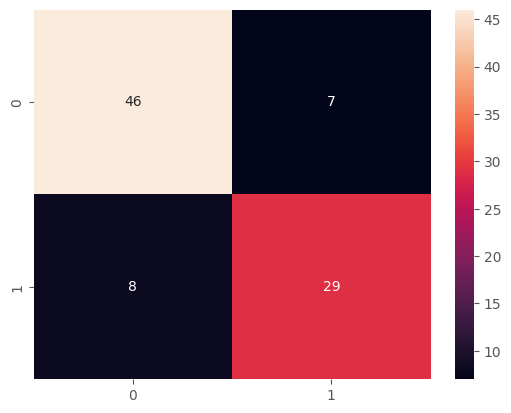

In [28]:
con=confusion_matrix(y_pred,y_test)
sns.heatmap(con,annot=True,cbar=True)

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.81      0.78      0.79        37

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



Prediction System

In [30]:
import numpy as np

input=(3,0,26.0,0,0,7.9250,2,2,2,0,2,1)

input_array=np.asarray(input)

input_reshape=input_array.reshape(1,-1)

prediction=model.predict(input_reshape)

if prediction[0]==1:
    print("This people is survive.")
else:
    print("This people is not survive.")

This people is survive.


C:\Users\User\anaconda3\envs\test_env2\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
df1=pd.DataFrame({
    "Actual":y_train,
    "Predict":model.predict(X_train)
})
df1

,Actual,Predict
165,1,1
541,0,0
625,0,0
388,0,0
76,0,0
...,...,...
106,1,1
270,0,0
860,0,0
435,1,1
